In [1]:
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
qr = QuantumRegister(10) 
cr = ClassicalRegister(10)
qc = QuantumCircuit(qr, cr) #make 10 Qubit and 10 Classical bit Quantum Circuit to solve problem 2

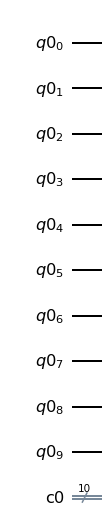

In [3]:
%matplotlib inline
qc.draw(output='mpl')

In [4]:
def make_entanglement(qc, a, b):
    qc.h(a)
    qc.cx(a, b)

In [5]:
def make_communicate(qc, a, b):
    qc.cx(a, b)
    qc.h(a)

In [6]:
def measure_pair(qc, a, b):
    qc.measure(a, a)
    qc.measure(b, b)

In [7]:
for qubit in range(5): #Use iteration to create entanglement.
    make_entanglement(qc, qubit*2, qubit*2 + 1)

In [8]:
qc.barrier()
for qubit in range(1,8,2):
    make_communicate(qc, qubit, qubit+1)

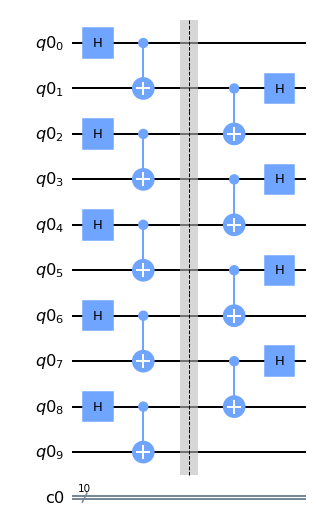

In [9]:
qc.draw(output='mpl')

In [10]:
qc.barrier()
#cz and cx gate is applied to convert to appropriate state using some pattern
for qubit in range(1,8,2): 
    qc.cz(qubit, 0)
    qc.cx(qubit+1, 9)

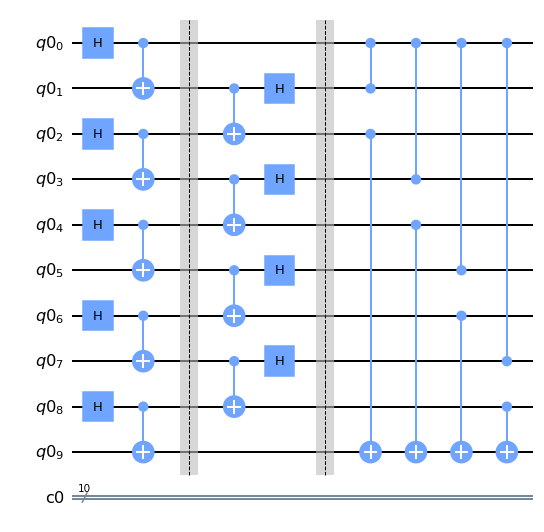

In [11]:
qc.draw(output='mpl')

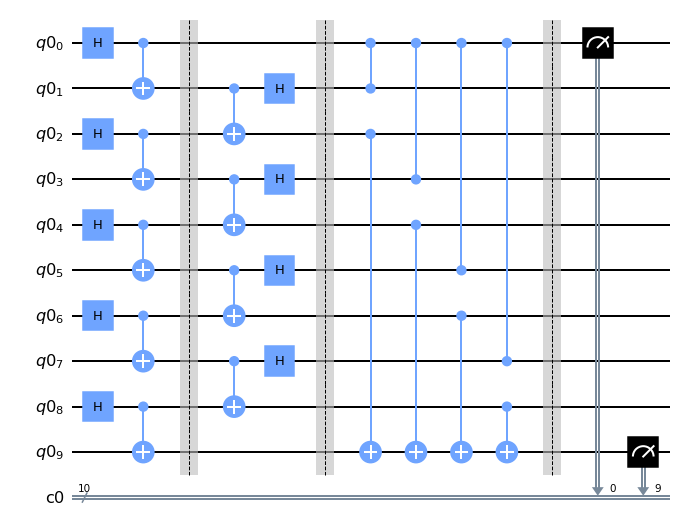

In [12]:
qc.barrier()
measure_pair(qc, 0, 9)
qc.draw(output='mpl')

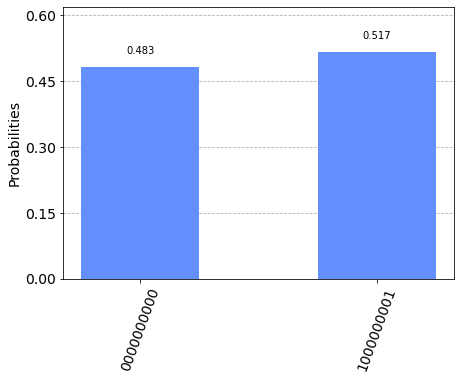

In [13]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts(qc))# we can see that the farthest two points are measured by the same value

In [14]:
counts = result.get_counts()
print(counts)

{'1000000001': 529, '0000000000': 495}


In [14]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(qc, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


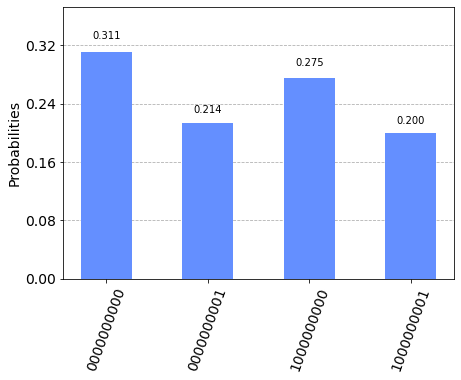

In [15]:
result = job.result()
plot_histogram(result.get_counts(qc)) # we can see that there is same error in real machine

In [16]:
counts = result.get_counts(qc)
print(f"The experimental error rate : {(1 - (counts['0000000000'] + counts['1000000001'])/sum(counts.values())) * 100 :.3f}%")

The experimental error rate : 48.926%
